In [1]:
# CHECK    1.  Understand the Problem Statement
# NO CHECK 2.  Inference and Hypothesis Testing
# CHECK    3.  Import DATA and Packages
# NO CHECK 4.  Exploratory Data Analysis
# CHECK        - Check for Imbalance Dataset and Apply sampling Techniques like SMOTE.
# NO CHECK     - Visualize Plots to infer from Data.
# NO CHECK     - Generate Insights.   
# CHECK    5.  Remove Duplicate Rows from Data if Present
# NO CHECK     - Generate Insights Again.
# CHECK    6.  Split Train Data into Train and Validation Data with Features(Independent) and Target Label(Dependent) Columns
# NO CHECK 7.  Outlier Detection and Outlier Removal 
# NO CHECK 8.  Check Data Incorrectness
# CHECK    9.  Convert Features which has Skew Distribution to Normal Distribution if needed.
# CHECK    10.  Imputation of data thru
# CHECK         10.1 Univariate  : Mean, Median, Mode   - HAVE Code
# CHECK         10.2 Mutivariate : MICE, IterativeImputer, KNN Imputer
# NO CHECK 11.  Feature Engineering 
# NO CHECK      11.1 Feature Correlation with Target Check - Multicolinearity Check
# NO CHECK      11.2 Feature Selection
# NO CHECK      11.3 Feature Creation and Handling Categorical Variables
# CHECK              11.3.1 Binning
# CHECK              11.3.2 Encoding - LabelEncoding, OneHotEncoding, TargetEncoding
# CHECK    12.  Data Scaling
# CHECK         12.1 Scaling - MinMaxScaler, StandardScaler, RobustScaler, Normalizer, MaxAbsScaler
# CHECK    13.  Creating Naive Model for Baselining
# CHECK    14.  Saving Models with VersionNumbers for Future Use
# CHECK    15.  Model Building and Hyper Parameter Tuning
# CHECK    16.  Cross Validation (5/10/15 FOLDS) 
# CHECK         with MODEL Evaluation METRICS like Accuracy, Precision, Recall, F1-Score, ROC-AUC, CV-Score
# CHECK         16.1 KFOLD            - Balanced Data
# CHECK         16.2 STRATIFIED KFOLD - Imbalanced Data
# CHECK    17. BUILD PIPELINE Interactively for above Steps
# CHECK    18. Result Submission - Both BINARY and MULTI CLASS CLASSIFICATION
# CHECK        18.1 Submission File
# NO CHECK     18.2 Report Generated - ROC_AUC Curve, Gains or Lift Charts based on the Models.

### 1.  Understand the Problem Statement :

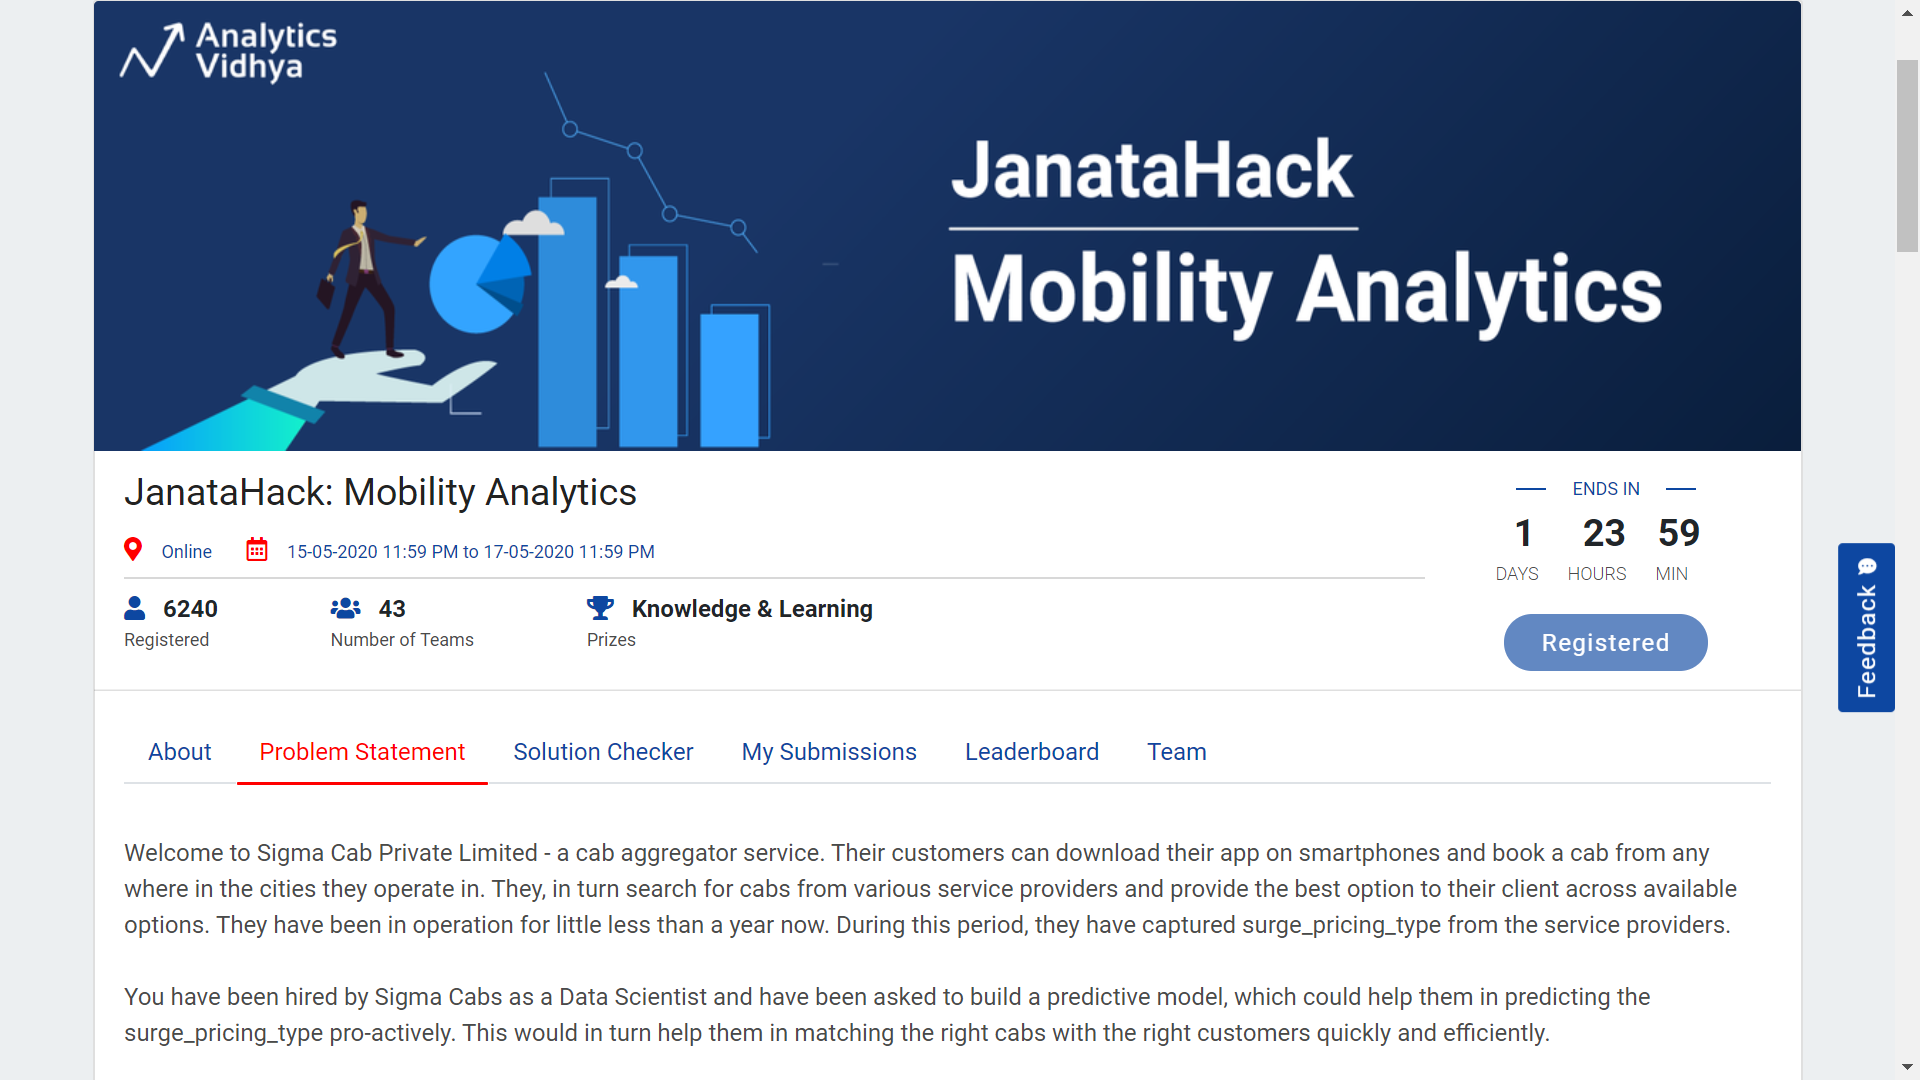

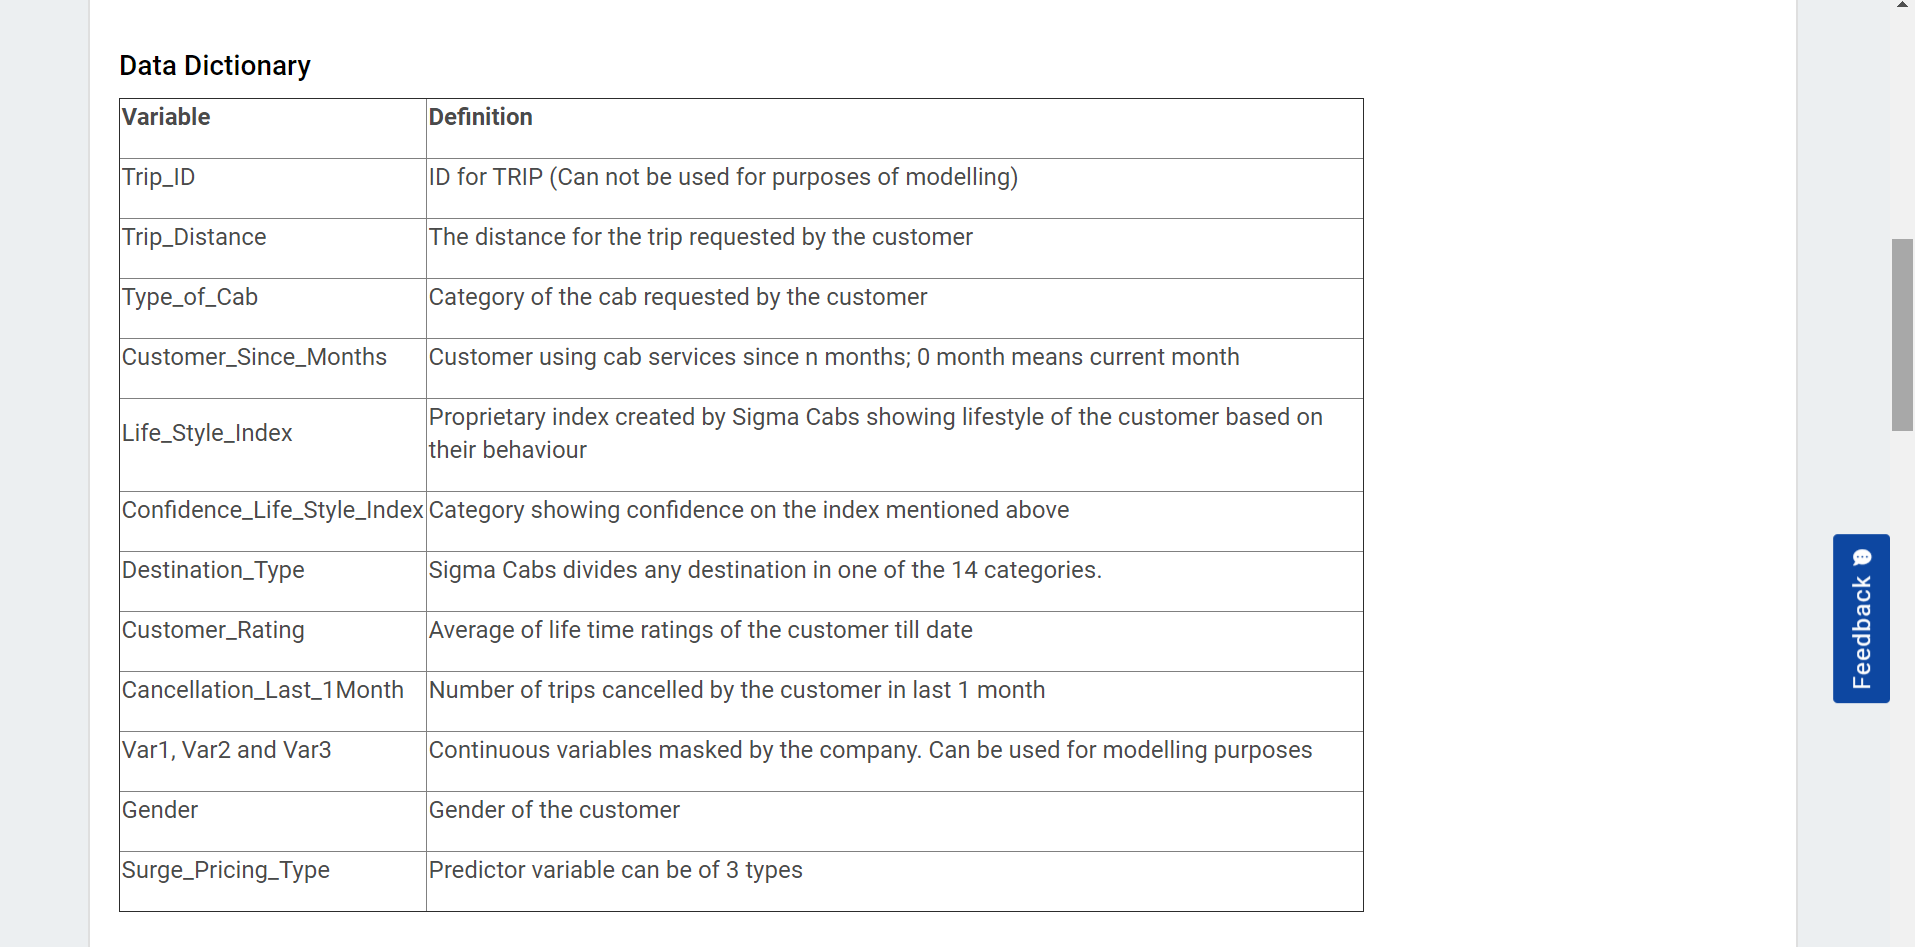

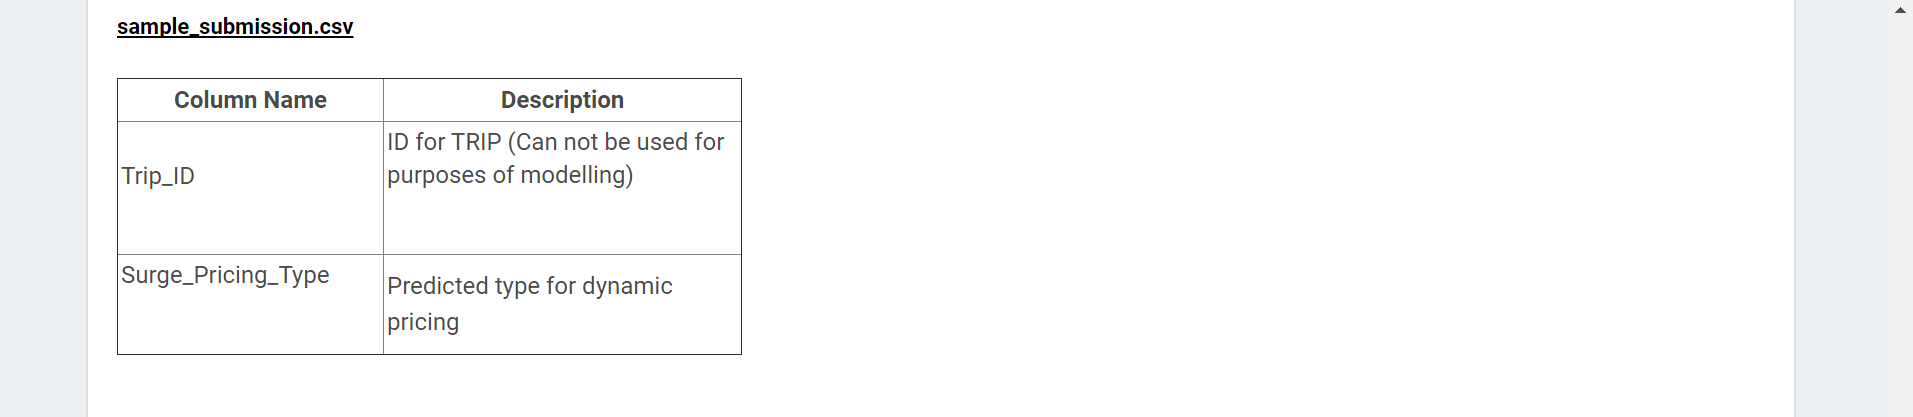

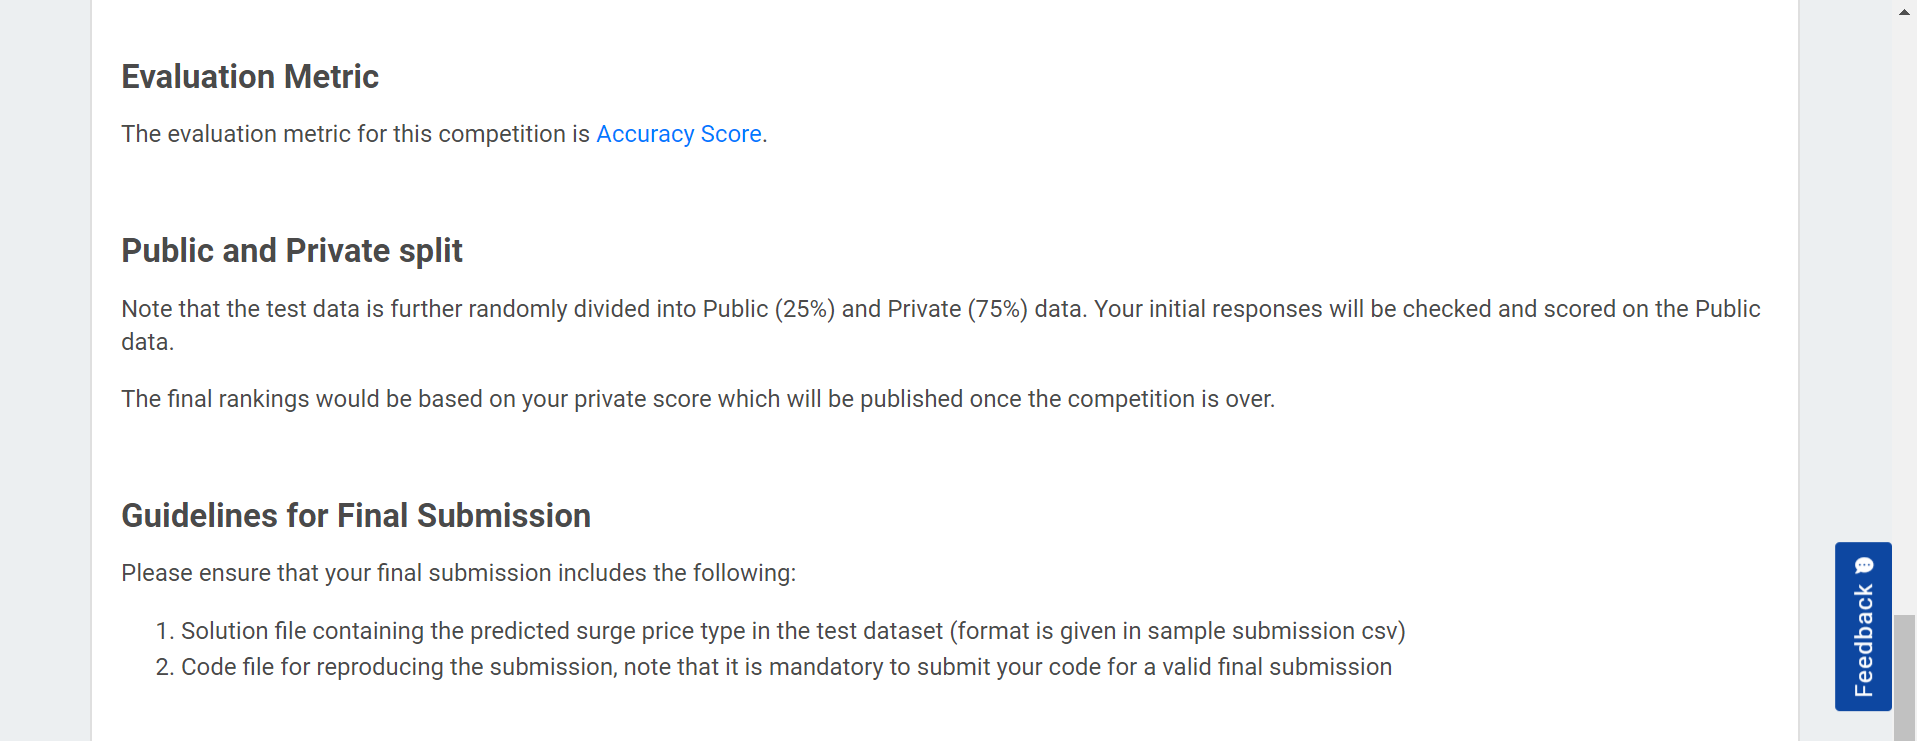

### 2.  Inference and Hypothesis Testing :

In [1]:
# SKIP NOW



### 3. Import Data and Required Packages :

In [44]:
# Warning Libraries :
import warnings
warnings.filterwarnings("ignore")

# Scientific and Data Manipulation Libraries :
import pandas as pd
from pandas.api.types import is_object_dtype, is_categorical
import numpy as np
import math
import gc
import os

# Data Viz & Regular Expression Libraries :
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Scikit-Learn ML Libraries :
from sklearn.externals                import joblib
from sklearn.preprocessing            import LabelEncoder, OneHotEncoder 
from sklearn.preprocessing            import StandardScaler, MinMaxScaler, Normalizer, RobustScaler, MaxAbsScaler
from sklearn.model_selection          import GridSearchCV, KFold, StratifiedKFold, train_test_split, cross_val_score
from sklearn.linear_model             import SGDClassifier, LogisticRegression, LinearRegression
from sklearn.linear_model             import MultiTaskElasticNet, ElasticNet, Lasso, RidgeClassifier, PassiveAggressiveClassifier
from sklearn.neighbors                import KNeighborsClassifier
from sklearn.svm                      import SVC, LinearSVC, NuSVC
from sklearn.gaussian_process         import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree                     import DecisionTreeClassifier
from sklearn.experimental             import enable_hist_gradient_boosting
from sklearn.ensemble                 import ExtraTreesClassifier, VotingClassifier, RandomForestClassifier
from sklearn.ensemble                 import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.naive_bayes              import MultinomialNB, GaussianNB, BernoulliNB, CategoricalNB, ComplementNB
from sklearn.discriminant_analysis    import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics                  import f1_score, accuracy_score, precision_score , recall_score, roc_auc_score, log_loss
from sklearn.metrics                  import confusion_matrix, classification_report
from sklearn.decomposition            import IncrementalPCA
from sklearn.pipeline                 import Pipeline
from sklearn.impute                   import SimpleImputer
from sklearn.compose                  import ColumnTransformer

# ML Statsmodels Libraries :
from statsmodels.stats.proportion     import proportion_confint

# Boosting Algorithms :
from xgboost                          import XGBClassifier
from catboost                         import CatBoostClassifier
from lightgbm                         import LGBMClassifier

np.random.seed(0)

In [3]:
os.chdir("C:/Users/LD196YS/Desktop/0.                          Winning_Kaggle/1. AV - HR Analytics Hackathon/0.     Mobility_Hackathon/")

In [4]:
pwd

'C:\\Users\\LD196YS\\Desktop\\0.                          Winning_Kaggle\\1. AV - HR Analytics Hackathon\\0.     Mobility_Hackathon'

In [5]:
train = pd.read_csv('1.Data/train_Wc8LBpr.csv')
train.drop(["Trip_ID","Var1"],axis = 1,inplace=True)
test  = pd.read_csv('1.Data/test_VsU9xXK.csv' )
test_ID = test["Trip_ID"]
test.drop(["Trip_ID","Var1"],axis = 1,inplace=True)

In [6]:
def display_head_tail(data, head_rows, tail_rows):
    
    print("### Data Head : ###")
    display(data.head(head_rows))
    print("")
    print("### Data Tail : ###")
    display(data.tail(tail_rows))
    
    return True

In [7]:
def display_data_information(data, data_types):
    print("### Data Information : ###\n")
    data.info()
    print("")
    for VARIABLE in data_types :
        data_type = data.select_dtypes(include=[ VARIABLE ]).dtypes
        if len(data_type) > 0 :
            print("### Data - "+str(len(data_type))+" "+VARIABLE+" Columns : ###")
            display(data_type)
    return True

In [8]:
def display_data_description(data, numeric_data_types, categorical_data_types):
    print("")
    print("### Data Description : ###")
    display(data.describe( include = numeric_data_types))
    display(data.describe( include = categorical_data_types))
    return True

In [9]:
def display_unique(data):
    for column in data.columns :
        
        print("No of Unique Values in "+column+" Column are : "+str(data[column].nunique()))
        print("Actual Unique Values in "+column+" Column are : "+str(data[column].sort_values(ascending=True,na_position='last').unique() ))
        print("NULL Values :")
        print(data[ column ].isnull().sum())
        print("Value Counts :")
        print(data[column].value_counts())
        print("")

In [10]:
def display_count_graph(data):
    counter = 0
    print("display_count_graph Line 1")
    for column in data.columns :
        print("Inside for loop Line 2")
        # Plotting a bar graph for Value Counts :
        value_count  = data[ column ].value_counts()
        print("Inside for loop Line 3")
        value_count = value_count[:,]
        print("Inside for loop Line 4")
        fig = plt.figure(figsize=(15,4))
        print("Inside for loop Line 5")
        sns.barplot(value_count.index, value_count.values, alpha=0.7)
        print("Inside for loop Line 6")
        plt.ylabel('Number of Occurrences', fontsize=12)
        print("Inside for loop Line 7")
        plt.xlabel(column, fontsize=12)
        print("Inside for loop Line 8")
        counter = counter + 1
        print("Inside for loop Line 9")
        column = re.sub('\W', '_', column)
        print("Inside for loop Line 10")
        plt.savefig("2.Count_Graphs/"+ str(counter)+".1 "+column+'.png')
        print("Inside for loop Line 11")
        plt.close(fig)
        print("Inside for loop Line 12")
    return True

In [11]:
def remove_duplicate(data):
    
    print("BEFORE REMOVING DUPLICATES : ",data.shape)
    data.drop_duplicates(keep=False, inplace=True) 
    print("AFTER REMOVING DUPLICATES : ",data.shape)
    
    return data

In [12]:
data_types             = ["float32","float64","int32","int64","object","category"]

train["Surge_Pricing_Type"] = train["Surge_Pricing_Type"].astype('object')

# Display Data Information :
display_data_information(train, data_types)

# Display Data Head and Tail :
display_head_tail(train, head_rows=5, tail_rows=2)

# Display Data Description :
display_data_description(train, data_types[0:4], data_types[4:6])

# display_count_graph(train)

train = remove_duplicate(train)

# display_count_graph(train)

### Data Information : ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 12 columns):
Trip_Distance                  131662 non-null float64
Type_of_Cab                    111452 non-null object
Customer_Since_Months          125742 non-null float64
Life_Style_Index               111469 non-null float64
Confidence_Life_Style_Index    111469 non-null object
Destination_Type               131662 non-null object
Customer_Rating                131662 non-null float64
Cancellation_Last_1Month       131662 non-null int64
Var2                           131662 non-null int64
Var3                           131662 non-null int64
Gender                         131662 non-null object
Surge_Pricing_Type             131662 non-null object
dtypes: float64(4), int64(3), object(5)
memory usage: 12.1+ MB

### Data - 4 float64 Columns : ###


Trip_Distance            float64
Customer_Since_Months    float64
Life_Style_Index         float64
Customer_Rating          float64
dtype: object

### Data - 3 int64 Columns : ###


Cancellation_Last_1Month    int64
Var2                        int64
Var3                        int64
dtype: object

### Data - 5 object Columns : ###


Type_of_Cab                    object
Confidence_Life_Style_Index    object
Destination_Type               object
Gender                         object
Surge_Pricing_Type             object
dtype: object

### Data Head : ###


,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Gender,Surge_Pricing_Type
0,6.77,B,1.0,2.42769,A,A,3.90500,0,46,60,Female,2
1,29.47,B,10.0,2.78245,B,A,3.45000,0,56,78,Male,2
2,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,56,77,Male,2
3,61.56,C,10.0,NaN,NaN,A,3.45375,0,52,74,Male,3
4,54.95,C,10.0,3.03453,B,A,3.40250,4,49,102,Male,2



### Data Tail : ###


,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Gender,Surge_Pricing_Type
131660,46.88,B,4.0,3.04744,A,B,4.15750,1,54,79,Male,2
131661,31.96,A,7.0,2.93773,A,E,2.63875,1,57,85,Male,1



### Data Description : ###


,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3
count,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,51.202800,75.099019
std,25.522882,3.626887,0.225796,0.980675,1.037559,4.986142,11.578278
min,0.310000,0.000000,1.596380,0.001250,0.000000,40.000000,52.000000
25%,24.580000,3.000000,2.654730,2.152500,0.000000,48.000000,67.000000
50%,38.200000,6.000000,2.798050,2.895000,0.000000,50.000000,74.000000
75%,60.730000,10.000000,2.946780,3.582500,1.000000,54.000000,82.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,124.000000,206.000000


,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender,Surge_Pricing_Type
count,111452,111469,131662,131662,131662
unique,5,3,14,2,3
top,B,B,A,Male,2
freq,31136,40355,77597,93900,56728


BEFORE REMOVING DUPLICATES :  (131662, 12)
AFTER REMOVING DUPLICATES :  (131662, 12)


In [13]:
# Display Unique Values in Columns :
display_unique(train)

No of Unique Values in Trip_Distance Column are : 10326
Actual Unique Values in Trip_Distance Column are : [  0.31   1.53   1.54 ... 109.21 109.22 109.23]
NULL Values :
0
Value Counts :
30.18     65
30.74     63
29.54     61
29.58     60
31.66     60
31.02     59
31.06     58
30.78     58
32.10     58
32.22     58
30.62     57
30.98     56
30.70     56
31.54     55
30.02     55
31.58     55
29.94     55
29.34     54
29.46     54
31.26     54
31.14     54
30.66     53
31.98     53
29.50     53
30.50     52
30.97     52
30.38     52
47.50     52
29.86     52
31.86     52
          ..
89.31      1
105.95     1
81.84      1
103.03     1
102.44     1
100.43     1
90.41      1
88.24      1
2.95       1
102.63     1
103.32     1
71.25      1
87.51      1
96.07      1
90.59      1
96.68      1
71.08      1
95.91      1
100.99     1
101.29     1
101.21     1
96.61      1
98.77      1
2.87       1
95.57      1
103.44     1
100.51     1
98.62      1
79.24      1
88.37      1
Name: Trip_Distance, 

In [14]:
print("TRAIN : ",train.shape)
print("TEST : ",test.shape)

TRAIN :  (131662, 12)
TEST :  (87395, 11)


In [15]:
def remove_fill_missing_values(data, fill_value, fill_types, columns):
    
    print("### Data NULL/NaN Values BEFORE REMOVAL : ###")
    display(data.isnull().sum())
    for column in columns :
        if "Value_Fill" in fill_types :
            data[ column ] = data[ column ].fillna(fill_value)
            print("Value_Fill")

        if "Forward_Fill" in fill_types :
            data = data.ffill(axis = 0)
            print("Forward_Fill")

        if "Backward_Fill" in fill_types :
            data = data.bfill(axis = 0)
            print("Backward_Fill")
    
    print("### Data NULL/NaN Values AFTER REMOVAL : ###")
    display(data.isnull().sum())
    
    return data

# # OLD BEST CODE : 0.6867791002
# fill_types = [ "Forward_Fill", "Backward_Fill"]
# fill_value = 0
# train = remove_fill_missing_values(train, fill_value, fill_types, columns=train.columns)
# test  = remove_fill_missing_values(test, fill_value, fill_types, columns=test.columns)

# NEW CODE :
# NEW BEST CODE : 

# WORKED WELL : 0.6925233215 
train['Type_of_Cab'] = train['Type_of_Cab'].fillna('F')
test ['Type_of_Cab'] = test ['Type_of_Cab'].fillna('F')

# WORKED WELL : 0.7005652314 
train['Customer_Since_Months'] = train['Customer_Since_Months'].fillna(11.0)
test ['Customer_Since_Months'] = test ['Customer_Since_Months'].fillna(11.0)

# WORKED WELL : 0.7030926888
train['Confidence_Life_Style_Index'] = train['Confidence_Life_Style_Index'].fillna("D")
test ['Confidence_Life_Style_Index'] = test ['Confidence_Life_Style_Index'].fillna("D")

# DIDNT WORK COMMENT : 0.702679104820551
# "BFILL" 
# train["Life_Style_Index"] = train["Life_Style_Index"].bfill(axis = 0)
# test["Life_Style_Index"]  = test["Life_Style_Index"].bfill(axis = 0)

# WORKED LITTLE BIT : 0.7031845963 - TOP !!!
# "FFILL" 

train["Life_Style_Index"] = train["Life_Style_Index"].ffill(axis = 0)
test["Life_Style_Index"]  = test["Life_Style_Index"].ffill(axis = 0)

# WORKED WELL : Median and mode combo - 0.7031845963 - TOP !!!
# train = train.fillna(train.median())
# test  = test.fillna ( test.median())
# train = train.fillna(train.mode().iloc[0])
# test  = test.fillna ( test.mode().iloc[0])

# WORKED WELL :  mean and mode combo 0.7031845963 - TOP !!!
train = train.fillna(train.mean())
test  = test.fillna ( test.mean())
train = train.fillna(train.mode().iloc[0])
test  = test.fillna ( test.mode().iloc[0])

In [45]:
Ensemble_Classifiers = {
                 '0.XGBoost_Version_1'     : XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=5,subsample = 0.70, 
                                                              objective='multiclass', scale_pos_weight = 2.5,updater ="grow_histmaker",base_score  = 0.2,
                                                               ),
    
                 '1.XGBoost_Version_2'     :  XGBClassifier(base_score=0.5, gamma=0.3, learning_rate=0.1, max_delta_step=0, max_depth=5,
                                                            missing=None, n_estimators=494, nthread=15,
                                                           objective='multiclass', reg_alpha=0, reg_lambda=1,
                                                           scale_pos_weight=2.5,  silent=True, subsample=1),

                 '2.CatBoost_Version_1'    : CatBoostClassifier(learning_rate=0.15, n_estimators=1000, subsample=0.085, max_depth=5, 
                                                                scale_pos_weight=2.5,
                                                                 random_strength= None, verbose=400,bootstrap_type="Bernoulli",
                                                                 objective=None,
                                                                 class_weights=[1, 2, 0.7],
#                                                                  loss_function=None,
#                                                                  loss_function='MultiClass',
#                                                                  loss_function='Logloss',
                                                                                              min_data_in_leaf=None,max_bin =None,l2_leaf_reg=None,bagging_temperature=None,depth=None,model_size_reg=None,rsm=None,border_count=None,feature_border_type=None,per_float_feature_quantization=None,                         
                                                                                              input_borders=None,output_borders=None,fold_permutation_block=None,od_pval=None,od_wait=None,nan_mode=None,counter_calc_method=None,leaf_estimation_iterations=None,
                                                                                              leaf_estimation_method=None,thread_count=None,logging_level=None,metric_period=None,ctr_leaf_count_limit=None,store_all_simple_ctr=None,
                                                                                              max_ctr_complexity=None,has_time=None,allow_const_label=None,classes_count=None,one_hot_max_size=None,name=None,ignored_features=None,train_dir=None,
                                                                                              custom_loss=None,custom_metric=None,eval_metric=None,save_snapshot=None,snapshot_file=None,snapshot_interval=None,fold_len_multiplier=None,
                                                                                              used_ram_limit=None,gpu_ram_part=None,allow_writing_files=None,final_ctr_computation_mode=None,approx_on_full_history=None,boosting_type=None,simple_ctr=None,combinations_ctr=None,per_feature_ctr=None,
                                                                                              task_type=None,device_config=None,devices=None,sampling_unit=None,dev_score_calc_obj_block_size=None,num_boost_round=None,
                                                                                              num_trees=None,colsample_bylevel=None,random_state=None,reg_lambda=None,eta=None,gpu_cat_features_storage=None,data_partition=None,
                                                                                              metadata=None,cat_features=None,min_child_samples=None,max_leaves=None,num_leaves=None,score_function=None,
                                                                                              leaf_estimation_backtracking=None,ctr_history_unit=None,monotone_constraints=None,feature_weights=None,penalties_coefficient=None,first_feature_use_penalties=None,model_shrink_rate=None,
                                                                                              model_shrink_mode=None,langevin=None,diffusion_temperature=None,boost_from_average=None,text_features=None,tokenizers=None,dictionaries=None,feature_calcers=None,text_processing=None),
               
                 '3.CatBoost_Version_2': CatBoostClassifier(learning_rate=0.15, n_estimators=494, subsample=0.085, max_depth=5, 
                                                            scale_pos_weight=2.5,
                                                                 random_strength= 0.157, verbose=400,bootstrap_type="Bernoulli",
                                                               class_weights=[1, 2, 0.7],
#                                                                loss_function=None,
#                                                                loss_function='MultiClass',
#                                                                loss_function='Logloss',
                                                                                              min_data_in_leaf=None,max_bin =None,l2_leaf_reg=None,bagging_temperature=None,depth=None,model_size_reg=None,rsm=None,border_count=None,feature_border_type=None,per_float_feature_quantization=None,                         
                                                                                              input_borders=None,output_borders=None,fold_permutation_block=None,od_pval=None,od_wait=None,nan_mode=None,counter_calc_method=None,leaf_estimation_iterations=None,
                                                                                              leaf_estimation_method=None,thread_count=None,logging_level=None,metric_period=None,ctr_leaf_count_limit=None,store_all_simple_ctr=None,
                                                                                              max_ctr_complexity=None,has_time=None,allow_const_label=None,classes_count=None,one_hot_max_size=None,name=None,ignored_features=None,train_dir=None,
                                                                                              custom_loss=None,custom_metric=None,eval_metric=None,save_snapshot=None,snapshot_file=None,snapshot_interval=None,fold_len_multiplier=None,
                                                                                              used_ram_limit=None,gpu_ram_part=None,allow_writing_files=None,final_ctr_computation_mode=None,approx_on_full_history=None,boosting_type=None,simple_ctr=None,combinations_ctr=None,per_feature_ctr=None,
                                                                                              task_type=None,device_config=None,devices=None,sampling_unit=None,dev_score_calc_obj_block_size=None,num_boost_round=None,
                                                                                              num_trees=None,colsample_bylevel=None,random_state=None,reg_lambda=None,objective=None,eta=None,gpu_cat_features_storage=None,data_partition=None,
                                                                                              metadata=None,cat_features=None,min_child_samples=None,max_leaves=None,num_leaves=None,score_function=None,
                                                                                              leaf_estimation_backtracking=None,ctr_history_unit=None,monotone_constraints=None,feature_weights=None,penalties_coefficient=None,first_feature_use_penalties=None,model_shrink_rate=None,
                                                                                              model_shrink_mode=None,langevin=None,diffusion_temperature=None,boost_from_average=None,text_features=None,tokenizers=None,dictionaries=None,feature_calcers=None,text_processing=None),
                                
                 '4.LightGBM_Version_1' : LGBMClassifier(  subsample_freq = 2, objective ="multiclass",importance_type = "gain",verbosity = -1, max_bin = 60,num_leaves = 300,boosting_type = 'dart',learning_rate=0.15, n_estimators=494, max_depth=5, scale_pos_weight=2.5),
            
                 '5.LightGBM_Version_2' : LGBMClassifier(  bagging_fraction=0.9, feature_fraction=0.9, subsample_freq = 2, objective ="binary",importance_type = "gain",verbosity = -1, max_bin = 60,num_leaves = 300,boosting_type = 'dart',learning_rate=0.15, n_estimators=494, max_depth=5, scale_pos_weight=2.5),
               
                 '6.ENSEMBLE_SOFT_BEST':  VotingClassifier(estimators=[('XGBoost_Best', list(Classifiers.values())[0]), 
                                                                     ('CatBoost_Best', list(Classifiers.values())[2]),
                                                                     ('LightGBM_1', list(Classifiers.values())[4]),], 
                                                                     voting='soft',weights=[5,5,5.2]),

                 '7.ENSEMBLE_HARD_BEST':  VotingClassifier(estimators=[('XGBoost_Best', list(Classifiers.values())[0]), 
                                                                     ('CatBoost_Best', list(Classifiers.values())[2]),
                                                                     ('LightGBM_1', list(Classifiers.values())[4]),], 
                                                                     voting='hard')
    
    
}

print( list(Ensemble_Classifiers.keys()) )
# print( list(Classifiers_Final.values()) )

['0.XGBoost_Version_1', '1.XGBoost_Version_2', '2.CatBoost_Version_1', '3.CatBoost_Version_2', '4.LightGBM_Version_1', '5.LightGBM_Version_2', '6.ENSEMBLE_SOFT_BEST']


In [46]:
Tree_Classifiers = {
                     '0.Decision_Tree' : DecisionTreeClassifier(),
                     '1.Random_Forest' : RandomForestClassifier(), 
                     '2.Extra_Trees'   : ExtraTreesClassifier(),  
                     '3.Bagging'       : BaggingClassifier(base_estimator = DecisionTreeClassifier(),  n_estimators = 500, random_state = 0)
                   }
print( list(Tree_Classifiers.keys()) )
# print( list(Tree_Classifiers.values()) )

['0.Decision_Tree', '1.Random_Forest', '2.Extra_Trees', '3.Bagging']


In [47]:
Boost_Classifiers = {
                     '0.Ada_Boost_Classifier'             : AdaBoostClassifier(),
                     '1.Gradient_Boosting_Classifier'     : GradientBoostingClassifier(), 
                     '2.Hist_Gradient_Boosting_Classifier': HistGradientBoostingClassifier()
                   }
print  ( list(Boost_Classifiers.keys()) )
# print( list(Boost_Classifiers.values()) )

['0.Ada_Boost_Classifier', '1.Gradient_Boosting_Classifier', '2.Hist_Gradient_Boosting_Classifier']


In [48]:
Discriminant_Classifiers = {
                     '0.Linear_Discriminant_Analysis'    : LinearDiscriminantAnalysis(), 
                     '1.Quadratic_Discriminant_Analysis' : QuadraticDiscriminantAnalysis(),
                     }
print  ( list(Discriminant_Classifiers.keys()) )
# print( list(Discriminant_Classifiers.values()) )

['0.Linear_Discriminant_Analysis', '1.Quadratic_Discriminant_Analysis']


In [49]:
Bayesian_Classifiers = {
                     '0.Gaussian_NB'        : GaussianNB(), 
                     '1.Multinomial_NB'     : MultinomialNB(),
                     '2.Bernoulli_NB'       : BernoulliNB(),
                     '3.Categorical_NB'     : CategoricalNB()
#                    '4.Complement_NB'      : ComplementNB()
                   }
print  ( list(Bayesian_Classifiers.keys()) )
# print( list(Bayesian_Classifiers.values()) )

['0.Gaussian_NB', '1.Multinomial_NB', '2.Bernoulli_NB', '3.Categorical_NB']


In [50]:
Linear_Classifiers = {
                      '0.LogisticRegression'          : LogisticRegression(),
                      '1.SGDClassifier'               : SGDClassifier(),
                      '2.RidgeClassifier'             : RidgeClassifier(),
                      '3.PassiveAggressiveClassifier' : PassiveAggressiveClassifier(),
                      '4.ElasticNet'                  : ElasticNet(),
                      '5.Lasso'                       : Lasso()
                     }
print  ( list(Linear_Classifiers.keys()) )
# print( list(Linear_Classifiers.values()) )

['0.LogisticRegression', '1.SGDClassifier', '2.RidgeClassifier', '3.PassiveAggressiveClassifier', '4.ElasticNet', '5.Lasso']


In [22]:
def generate_feature_target(data,drop_variables):
    
    X_data = data.drop( drop_variables, axis = 1 )
    y_data = data[ drop_variables[0] ].to_frame()
    
    return X_data, y_data

# NOTE : Always mention Target Variable as 1st Drop Variable:
drop_variables = ["Surge_Pricing_Type"]
X_train, y_train = generate_feature_target(train ,drop_variables)
X_test = test

# display(X_train.head(2))
# display(y_train.head(2))
# display(X_test.head(2))

numeric_features        = X_train.select_dtypes( include=['float32', 'float64', 'int32','int64',] ).columns
categorical_features    = X_train.select_dtypes( include=['object','category']).columns

numeric_transformer     = Pipeline( steps=[('imputer', SimpleImputer(strategy='median')),('scaler', MinMaxScaler())] )
categorical_transformer = Pipeline( steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                           ('onehot',  OneHotEncoder(handle_unknown='ignore'))] )

preprocessor            = ColumnTransformer( transformers=[('num', numeric_transformer,     numeric_features    ),
                                                           ('cat', categorical_transformer, categorical_features)] )

classifiers             = [ 

                           SGDClassifier(loss='log'),
                           LogisticRegression(),

#                            KNeighborsClassifier()                           
                           ]
counter                 = 1
fold                    = KFold( n_splits=5, random_state = 0 )
accuracy, y_pred_list, y_pred_probab_list, training_score, auc,testing_score, recall, precision, f1 = [],[],[],[],[],[],[],[],[]

print("X_train.shape",X_train.shape," | X_train.shape",y_train.shape)

def ens(X_train, y_train) :
    counter = 60
    for classifier in classifiers:
        for train_index, test_index in fold.split(X_train,y_train) :
            
            y_train = y_train.astype('str')
            x_train_new, x_val = X_train.iloc[list(train_index)], X_train.iloc[list(test_index)]
            y_train_new, y_val = y_train.iloc[list(train_index)], y_train.iloc[list(test_index)]

            pipe               = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])
            pipe               = pipe.fit( x_train_new,y_train_new )
            y_val_pred         = pipe.predict(x_val)
            y_val_pred_proba   = pipe.predict_proba(x_val)[:,1]

            training_score.append(pipe.score(x_train_new,y_train_new))
            testing_score.append(pipe.score(x_val,y_val))
#             print(y_val_pred_proba)
            precision.append(precision_score(y_val,y_val_pred,average = 'micro'))
            recall.append(recall_score(y_val,y_val_pred,average = 'micro'))
#             auc.append(roc_auc_score(y_val,y_val_pred_proba.reshape(-1,1), multi_class= 'ovr'))
            accuracy.append(accuracy_score(y_val, y_val_pred))
            f1.append(f1_score(y_val, y_val_pred,average = 'micro'))
            y_pred_list.append(y_val_pred)
            y_pred_probab_list.append(y_val_pred_proba)
            counter = counter + 1
            print("Classifier      : FOLD : ",counter,classifier)
    
            print("accuracy        : ",np.mean(accuracy)*100)
            print("training_score  : ",np.mean(training_score)*100)
            print("testing_score   : ",np.mean(testing_score)*100)
            print("precision       : ",np.mean(precision)*100)
            print("recall          : ",np.mean(recall)*100)
            print("f1              : ",np.mean(recall)*100)
    
    return accuracy,y_pred_list,y_pred_probab_list,training_score,testing_score,precision,recall
        
accuracy,y_pred_list,y_pred_probab_list,training_score,testing_score,precision,recall = ens(X_train, y_train)

ensemble=pd.DataFrame({'names':[
#                                 '2.CatBoost',
#                                 '3.CatBoost',
#                                 '0.XGBoost',
#                                 '1.XGBoost',
#                                 '4.LightGBM',
# #                                 '5.LightGBM',
#                                 '6.Ensemble_SOFT',
#                                 '7.DecisionTreeClassifier',
#                                 '8.RandomForestClassifier',
#                                 '9.ExtraTreesClassifier',
#                                 '10.LinearDiscriminantAnalysis',
#                                 '11.BaggingClassifier', # TOO SLOW TAKES TOO LONG
#                                 '12.MultinomialNB',
#                                 '13.SGDClassifier',
#                                 '14.LogisticRegression',
#                                 '15.AdaBoostClassifier',
#                                 '16.GradientBoostingClassifier',
                                '17.KNeighborsClassifier',
                               ],
                       'accuracy':np.mean(accuracy),'training':np.mean(training_score),'testing':np.mean(testing_score),
                       'precision':np.mean(precision),'recall':np.mean(recall)})
        
ensemble=ensemble.sort_values(by='accuracy',ascending=False).reset_index(drop=True)
display("ENSEMBLE : ",ensemble)

X_train.shape (131662, 11)  | X_train.shape (131662, 1)
Classifier : FOLD : 61 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
accuracy 68.70086963126116
training_score 68.95062138632285
testing_score 68.70086963126116
precision 68.70086963126116
recall 68.70086963126116
Classifier : FOLD : 62 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, sh

'ENSEMBLE : '

,names,accuracy,training,testing,precision,recall
0,13.SGDClassifier,0.682944,0.70276,0.682944,0.682944,0.682944
1,14.LogisticRegression,0.682944,0.70276,0.682944,0.682944,0.682944
2,15.AdaBoostClassifier,0.682944,0.70276,0.682944,0.682944,0.682944
3,16.GradientBoostingClassifier,0.682944,0.70276,0.682944,0.682944,0.682944
4,17.KNeighborsClassifier,0.682944,0.70276,0.682944,0.682944,0.682944


In [23]:
display("ENSEMBLE : ",ensemble)

'ENSEMBLE : '

,names,accuracy,training,testing,precision,recall
0,13.SGDClassifier,0.682944,0.70276,0.682944,0.682944,0.682944
1,14.LogisticRegression,0.682944,0.70276,0.682944,0.682944,0.682944
2,15.AdaBoostClassifier,0.682944,0.70276,0.682944,0.682944,0.682944
3,16.GradientBoostingClassifier,0.682944,0.70276,0.682944,0.682944,0.682944
4,17.KNeighborsClassifier,0.682944,0.70276,0.682944,0.682944,0.682944


In [ ]:
X=df1.drop('target',1)
y=df1['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =1)

#declare the models
lr = LogisticRegression()
rf=RandomForestClassifier()
adb=ensemble.AdaBoostClassifier()
bgc=ensemble.BaggingClassifier()
gnb = GaussianNB()
knn=KNeighborsClassifier()
dt = DecisionTreeClassifier()
bgcl_lr = BaggingClassifier(base_estimator=lr, random_state=0)

models=[lr,rf,adb,bgc,gnb,knn,dt,bgcl_lr]
sctr,scte,auc,ps,rs=[],[],[],[],[]

def ens(X_train,X_test, y_train, y_test):
    for model in models:
            model.fit(X_train, y_train)
            y_test_pred = model.predict(X_test)
            y_test_pred_new=model.predict_proba(X_test)
            y_test_pred_new=y_test_pred_new[:,1]
            train_score=model.score(X_train,y_train)
            test_score=model.score(X_test,y_test)
            p_score=metrics.precision_score(y_test,y_test_pred)
            r_score=metrics.recall_score(y_test,y_test_pred)
            
            ac=metrics.roc_auc_score(y_test,y_test_pred_new)
            
            sctr.append(train_score)
            scte.append(test_score)
            ps.append(p_score)
            rs.append(r_score)
            auc.append(ac)
    def ens(X_train,X_test, y_train, y_test):
    return sctr,scte,auc,ps,rs

ens(X_train,X_test, y_train, y_test)
# 'ab_rf','ab_dt','ab_nb','ab_lr','bgcl_lr'
ensemble=pd.DataFrame({'names':['Logistic Regression','Random Forest','Ada boost','Bagging',
                                'Naive-Bayes','KNN','Decistion Tree',
                                'bagged LR'],
                       'auc_score':auc,'training':sctr,'testing':scte,'precision':ps,'recall':rs})
ensemble=ensemble.sort_values(by='auc_score',ascending=False).reset_index(drop=True)
ensemble

In [ ]:
# param_grid = { 
#     'classifier__n_estimators': [200, 500],
#     'classifier__max_features': ['auto', 'sqrt', 'log2'],
#     'classifier__max_depth' : [4,5,6,7,8],
#     'classifier__criterion' :['gini', 'entropy']}

# CV = GridSearchCV(rf, param_grid, n_jobs= 1)
                  
# CV.fit(X_train, y_train)  
# print(CV.best_params_)    
# print(CV.best_score_)

In [ ]:
stop!!!

In [ ]:
def binning( data, column, bin_list, labels_list ):
    data[ column ] = pd.cut(x=data[ column ], bins= bin_list , labels= labels_list )
    return data[ column ]

# BINNING & No MISSING - Var2 min 40. max 124.  25% 48.000000	mean 51.2	75% 54.000000 

# Reduced Score : 0.701116676623317
# column      = "Var2"
# bins_list   = [40, 45, 52, 55 ,124]
# labels_list = ['40', '52', '54','124']
# Var3 min 52. max 206.  25% 67.000000	mean 75.099019	75% 82.000000 
# column      = "Var3"
# bins_list   = [52, 75, 206]
# labels_list = ['52', '206']

# train[ column ] = binning(train, column, bins_list, labels_list)
# test [ column ] = binning(test , column, bins_list, labels_list)

# train = pd.get_dummies( train  )
# test = pd.get_dummies( test  )

display(train.head())
display(test.head())

In [ ]:
train.shape

In [ ]:
# display(train.Var2.unique())

In [ ]:
def replace_column_values(data, data_column,actual_value,replace_value) :
    data[ data_column ] = data[ data_column ].replace( [actual_value], replace_value )
    return data[ data_column ]

# column          = "age"
# train[ column ] = replace_column_values(train,column =column,actual_value=39,replace_value=49)
# test [ column ] = replace_column_values(test ,column =column,actual_value=39,replace_value=49)

In [ ]:
def generate_feature_target(data,drop_variables):
    
    X_data = data.drop( drop_variables, axis = 1 )
    y_data = data[ drop_variables[0] ].to_frame()
    
    return X_data, y_data

# NOTE : Always mention Target Variable as 1st Drop Variable:
drop_variables = ["Surge_Pricing_Type"]
X_train, y_train = generate_feature_target(train ,drop_variables)
X_test = test

display(X_train.head(2))
display(y_train.head(2))
display(X_test.head(2))

In [ ]:
def data_encoding( encoding_strategy , encoding_data , encoding_columns ):
    
    if encoding_strategy == "LabelEncoding":
        Encoder = LabelEncoder()
        for column in encoding_columns :
            encoding_data[ column ] = Encoder.fit_transform(tuple(encoding_data[ column ]))
        
    elif encoding_strategy == "OneHotEncoding":
#         display(encoding_data[encoding_columns])
        encoding_data = pd.get_dummies( encoding_data  )
        
    elif encoding_strategy == "TargetEncoding":
        ## Code Coming soon
        print("TargetEncoding")

    else :
        encoding_data = pd.get_dummies( encoding_data[encoding_columns]  )
        
    dtypes_list =['float64','float32','int64','int32']
    # BEST CODE : 0.6872386379302422
    encoding_data.astype( dtypes_list[0] ).dtypes # UNCOMMENTED EARLIER
    # NEW CODE : 0.6872386379302422 - NO CHANGE !!!
    # encoding_data.astype( dtypes_list[0] ).dtypes - COMMENTED NOW
    
    return encoding_data

In [ ]:
X_train.head()

In [ ]:
encoding_columns  = [  "Sample" ]
encoding_strategy = [ "OneHotEncoding", "LabelEncoding", "TargetEncoding", "ELSE"]

X_train_encode = data_encoding( encoding_strategy[1] , X_train , X_train.columns )
X_test_encode  = data_encoding( encoding_strategy[1] , X_test ,  X_test.columns )

In [ ]:
print("X_train_encode SHAPE   : ",X_train_encode.shape)
display("X_train_encode COLUMNS : ",X_train_encode.head())
print("X_test_encode SHAPE   : ",X_test_encode.shape)
display("X_test_encode COLUMNS : ",X_test_encode.head())

In [ ]:
def data_scaling( scaling_strategy , scaling_data , scaling_columns ):
    
    if    scaling_strategy =="RobustScaler" :
        scaling_data[scaling_columns] = RobustScaler().fit_transform(scaling_data[scaling_columns])
    elif  scaling_strategy =="StandardScaler" :
        scaling_data[scaling_columns] = StandardScaler().fit_transform(scaling_data[scaling_columns])
        
    elif  scaling_strategy =="MinMaxScaler" :
        scaling_data[scaling_columns] = MinMaxScaler().fit_transform(scaling_data[scaling_columns])
        
    elif  scaling_strategy =="MaxAbsScaler" :
        scaling_data[scaling_columns] = MaxAbsScaler().fit_transform(scaling_data[scaling_columns])
        
    else :  # If any other scaling send by mistake still perform Robust Scalar
        scaling_data[scaling_columns] = RobustScaler().fit_transform(scaling_data[scaling_columns])
#         display("scaling_data",scaling_data)
    return scaling_data

In [ ]:
#Scaling :
scaling_strategy = ["RobustScaler", "StandardScaler","MinMaxScaler","MaxAbsScaler", "ELSE"]
X_train_scale = data_scaling( scaling_strategy[2] , X_train_encode , X_train_encode.columns )
X_test_scale = data_scaling( scaling_strategy[2]  , X_test_encode , X_train_encode.columns )

# X_train_scale = X_train_encode
# X_test_scale = X_test_encode

### Modeling :

In [ ]:
Classifiers = {
                 '0.XGBoost_Version_1'     : XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=5,subsample = 0.70, 
                                                              objective='multiclass', scale_pos_weight = 2.5,updater ="grow_histmaker",base_score  = 0.2,
                                                               ),
    
                 '1.XGBoost_Version_2'     :  XGBClassifier(base_score=0.5, gamma=0.3, learning_rate=0.1, max_delta_step=0, max_depth=5,
                                                            missing=None, n_estimators=494, nthread=15,
                                                           objective='multiclass', reg_alpha=0, reg_lambda=1,
                                                           scale_pos_weight=2.5,  silent=True, subsample=1),

                 '2.CatBoost_Version_1': CatBoostClassifier(learning_rate=0.15, n_estimators=1000, subsample=0.085, max_depth=5, 
#                                                             scale_pos_weight=2.5,
                                                                 random_strength= None, verbose=400,bootstrap_type="Bernoulli",
                                                                 objective="multiclass",
                                                                 class_weights=[1, 2, 0.7],
                                                                                              min_data_in_leaf=None,max_bin =None,l2_leaf_reg=None,bagging_temperature=None,depth=None,model_size_reg=None,rsm=None,loss_function=None,border_count=None,feature_border_type=None,per_float_feature_quantization=None,                         
                                                                                              input_borders=None,output_borders=None,fold_permutation_block=None,od_pval=None,od_wait=None,nan_mode=None,counter_calc_method=None,leaf_estimation_iterations=None,
                                                                                              leaf_estimation_method=None,thread_count=None,logging_level=None,metric_period=None,ctr_leaf_count_limit=None,store_all_simple_ctr=None,
                                                                                              max_ctr_complexity=None,has_time=None,allow_const_label=None,classes_count=None,one_hot_max_size=None,name=None,ignored_features=None,train_dir=None,
                                                                                              custom_loss=None,custom_metric=None,eval_metric=None,save_snapshot=None,snapshot_file=None,snapshot_interval=None,fold_len_multiplier=None,
                                                                                              used_ram_limit=None,gpu_ram_part=None,allow_writing_files=None,final_ctr_computation_mode=None,approx_on_full_history=None,boosting_type=None,simple_ctr=None,combinations_ctr=None,per_feature_ctr=None,
                                                                                              task_type=None,device_config=None,devices=None,sampling_unit=None,dev_score_calc_obj_block_size=None,num_boost_round=None,
                                                                                              num_trees=None,colsample_bylevel=None,random_state=None,reg_lambda=None,eta=None,gpu_cat_features_storage=None,data_partition=None,
                                                                                              metadata=None,cat_features=None,min_child_samples=None,max_leaves=None,num_leaves=None,score_function=None,
                                                                                              leaf_estimation_backtracking=None,ctr_history_unit=None,monotone_constraints=None,feature_weights=None,penalties_coefficient=None,first_feature_use_penalties=None,model_shrink_rate=None,
                                                                                              model_shrink_mode=None,langevin=None,diffusion_temperature=None,boost_from_average=None,text_features=None,tokenizers=None,dictionaries=None,feature_calcers=None,text_processing=None),
               
                 '3.CatBoost_Version_2': CatBoostClassifier(learning_rate=0.15, n_estimators=494, subsample=0.085, max_depth=5, 
#                                                             scale_pos_weight=2.5,
                                                                 random_strength= 0.157, verbose=400,bootstrap_type="Bernoulli",
                                                               class_weights=[1, 2, 0.7],
                                                                                              min_data_in_leaf=None,max_bin =None,l2_leaf_reg=None,bagging_temperature=None,depth=None,model_size_reg=None,rsm=None,loss_function=None,border_count=None,feature_border_type=None,per_float_feature_quantization=None,                         
                                                                                              input_borders=None,output_borders=None,fold_permutation_block=None,od_pval=None,od_wait=None,nan_mode=None,counter_calc_method=None,leaf_estimation_iterations=None,
                                                                                              leaf_estimation_method=None,thread_count=None,logging_level=None,metric_period=None,ctr_leaf_count_limit=None,store_all_simple_ctr=None,
                                                                                              max_ctr_complexity=None,has_time=None,allow_const_label=None,classes_count=None,one_hot_max_size=None,name=None,ignored_features=None,train_dir=None,
                                                                                              custom_loss=None,custom_metric=None,eval_metric=None,save_snapshot=None,snapshot_file=None,snapshot_interval=None,fold_len_multiplier=None,
                                                                                              used_ram_limit=None,gpu_ram_part=None,allow_writing_files=None,final_ctr_computation_mode=None,approx_on_full_history=None,boosting_type=None,simple_ctr=None,combinations_ctr=None,per_feature_ctr=None,
                                                                                              task_type=None,device_config=None,devices=None,sampling_unit=None,dev_score_calc_obj_block_size=None,num_boost_round=None,
                                                                                              num_trees=None,colsample_bylevel=None,random_state=None,reg_lambda=None,objective=None,eta=None,gpu_cat_features_storage=None,data_partition=None,
                                                                                              metadata=None,cat_features=None,min_child_samples=None,max_leaves=None,num_leaves=None,score_function=None,
                                                                                              leaf_estimation_backtracking=None,ctr_history_unit=None,monotone_constraints=None,feature_weights=None,penalties_coefficient=None,first_feature_use_penalties=None,model_shrink_rate=None,
                                                                                              model_shrink_mode=None,langevin=None,diffusion_temperature=None,boost_from_average=None,text_features=None,tokenizers=None,dictionaries=None,feature_calcers=None,text_processing=None),
                                
                 '4.LightGBM_Version_1' : LGBMClassifier(  subsample_freq = 2, objective ="multiclass",importance_type = "gain",verbosity = -1, max_bin = 60,num_leaves = 300,boosting_type = 'dart',learning_rate=0.15, n_estimators=494, max_depth=5, scale_pos_weight=2.5),
            
                 '5.LightGBM_Version_2' : LGBMClassifier(  bagging_fraction=0.9, feature_fraction=0.9, subsample_freq = 2, objective ="binary",importance_type = "gain",verbosity = -1, max_bin = 60,num_leaves = 300,boosting_type = 'dart',learning_rate=0.15, n_estimators=494, max_depth=5, scale_pos_weight=2.5),
               
                 
    
    
}

print( list(Classifiers.keys()) )
# print( list(Classifiers_Final.values()) )

### 4. Exploratory Data Analysis :

In [ ]:
Classifiers['6.Ensemble_HARD_Version_1']  = VotingClassifier(estimators=[
                                              ('XGBoost_Best', list(Classifiers.values())[0]), 
                                              ('CatBoost_Best', list(Classifiers.values())[2]),
                                              ('LightGBM_1', list(Classifiers.values())[4]),
                                             ], 
                                              voting='hard')   
    
Classifiers['7.Ensemble_SOFT_Version_2']  = VotingClassifier(estimators=[
                                              ('XGBoost_Best', list(Classifiers.values())[0]), 
                                              ('CatBoost_Best', list(Classifiers.values())[2]),
                                              ('LightGBM_1', list(Classifiers.values())[4]),
                                             ], 
                                              voting='soft',weights=[5,5,5.2])
    
Classifiers['8.Ensemble_SOFT_Version_3']  = VotingClassifier(estimators=[
                                              ('XGBoost_Best', list(Classifiers.values())[1]), 
                                              ('CatBoost_Best', list(Classifiers.values())[2]),
                                              ('LightGBM_1', list(Classifiers.values())[5]),
                                             ], 
                                              voting='soft',weights=[5,5,5])

Classifiers['9.Ensemble_SOFT_Version_4']  =   VotingClassifier(estimators=[
                                              ('XGBoost_Best', list(Classifiers.values())[0]), 
                                              ('CatBoost_Best', list(Classifiers.values())[2]),
                                              ('LightGBM_1', list(Classifiers.values())[5]),
                                             ], 
                                              voting='soft',weights=[5,5,5.2])

In [ ]:
model_names = list(Classifiers.keys())
print(model_names)

In [ ]:
Classifiers["10.Decision_Tree_Version_1"] = DecisionTreeClassifier()
Classifiers["11.MultinomialNB_Version_1"] = MultinomialNB()
Classifiers["12.RandomForestClassifier_Version_1"] = RandomForestClassifier()
Classifiers["13.SGDClassifier_Version_1"] = SGDClassifier()
Classifiers["14.LogisticRegression_Version_1"] = LogisticRegression()
Classifiers["15.AdaBoostClassifier_Version_1"] = AdaBoostClassifier()

Classifiers['16.Ensemble_HARD_Version_1']  =   VotingClassifier(estimators=[
                                              ('0.XGBoost', list(Classifiers.values())[0]), 
                                              ('4.LightGBM', list(Classifiers.values())[4]),
                                              ('1.XGBoost', list(Classifiers.values())[1]),
                                             ], 
                                              voting='hard')

Classifiers['17.Ensemble_SOFT_Version_1']  =   VotingClassifier(estimators=[
                                              ('0.XGBoost', list(Classifiers.values())[0]), 
                                              ('4.LightGBM', list(Classifiers.values())[4]),
                                              ('1.XGBoost', list(Classifiers.values())[1]),
                                             ], 
                                              voting='soft',weights=[5,5,5.2])

Classifiers['18.Ensemble_SOFT_Version_2']  =   VotingClassifier(estimators=[
                                              ('0.XGBoost', list(Classifiers.values())[0]), 
                                              ('4.LightGBM', list(Classifiers.values())[4]),
                                              ('12.RandomForest', list(Classifiers.values())[12]),
                                             ], 
                                              voting='soft',weights=[5,5,5.2])
Classifiers['19.Ensemble_SOFT_Version_3']  =   VotingClassifier(estimators=[
                                              ('0.XGBoost', list(Classifiers.values())[0]), 
                                              ('4.LightGBM', list(Classifiers.values())[4]),
                                              ('15.Adaboost', list(Classifiers.values())[15]),
                                             ], 
                                              voting='soft',weights=[5,5,5.2])

Classifiers['20.Ensemble_SOFT_Version_4_BEST']  =   VotingClassifier(estimators=[
                                              ('2.CatBoost', list(Classifiers.values())[2]),
                                              ('0.XGBoost', list(Classifiers.values())[0]),
                                             
                                              ('4.LightGBM', list(Classifiers.values())[4]),
                                              
                                             ], 
                                              voting='soft',weights=[5,5,5])

In [ ]:
Classifiers['21.KNeighborsClassifier_Version_1']  =  KNeighborsClassifier()
Classifiers['22.LinearDiscriminantAnalysis_Version_1']  =  LinearDiscriminantAnalysis()
Classifiers["23.RandomForestClassifier_Version_2"] = RandomForestClassifier()
Classifiers["24.ExtraTreesClassifier_Version_1"] = ExtraTreesClassifier()

In [ ]:
counter = 1
errxgb = []
y_pred_tot_xgb = []

fold = KFold(n_splits=10, random_state = 0)

print("X_train_scale.shape",X_train_scale.shape," | X_train_scale.shape",y_train.shape)

for train_index, test_index in fold.split(X_train_scale,y_train):
    x_train_new, x_val = X_train_scale.iloc[list(train_index)], X_train_scale.iloc[list(test_index)]
    y_train_new, y_val = y_train.iloc[list(train_index)], y_train.iloc[list(test_index)]
    m = VotingClassifier(estimators=[
                                              ('0.XGBoost', list(Classifiers.values())[0]), 
                                              ('4.LightGBM', list(Classifiers.values())[4]),
                                              ('2.CatBoost', list(Classifiers.values())[1]),
                                             ], 
                                              voting='soft',weights=[5,5,5.2])

    m.fit(x_train_new, y_train_new )
    pred_y = m.predict(x_val)
    print("ENSEMBLE ACCURACY : ",counter,accuracy_score(y_val,pred_y))
    errxgb.append(accuracy_score(y_val, pred_y))
    pred_test = m.predict(X_test_scale)
    y_pred_tot_xgb.append(pred_test)

    counter = counter + 1

In [ ]:
Ensemble_Stratified = np.median(y_pred_tot_xgb, 0)

KFOLD_file_name = "Ensemble_KFOLD_10_BEST_SCORE_MEDIAN_BEST_SUBMISSION"

# Ensemble_Stratified = [int(round(value)) for value in Ensemble_Stratified]

Result_Promoted = pd.DataFrame({'Trip_ID': test_ID, 'Surge_Pricing_Type' : Ensemble_Stratified})
Result_Promoted.to_csv(r"3.Final_Data/2.Submissions/"+ KFOLD_file_name +".csv",index=False)

In [ ]:
# def model_train_predict_submit( Classifiers_model_name, model_name ,X_train, y_train, X_test, target ):
    
#     submission_file = "S"+ model_name
#     ml_model_location = r'C:/Users/LD196YS/Desktop/0.                          Winning_Kaggle/1. AV - HR Analytics Hackathon/0.     Mobility_Hackathon/3.Final_Data/1.Models/'
#     joblib.dump( Classifiers_model_name.fit( X_train, y_train), str(ml_model_location) + submission_file +'.pkl' )
#     model = joblib.load(  ml_model_location + submission_file+'.pkl' )
    
# #     # FEATURE IMPORTANCE CODE :
# #     # Computing the importance of each feature 
# #     feature_importance = model.feature_importances_ 
# #     # Normalizing the individual importances 
# #     feature_importance_normalized = np.std([tree.feature_importances_ for tree in model.estimators_], axis = 0) 
# #     # Plotting a Bar Graph to compare the models 
# #     fig = plt.figure(figsize=(25,4))
# #     plt.bar(X_train.columns, feature_importance_normalized) 
# #     plt.xlabel('Feature Labels') 
# #     plt.ylabel('Feature Importances') 
# #     plt.title('Comparison of different Feature Importances') 
# #     plt.savefig(model_name+'.png')
# #     plt.close(fig)
# #     plt.show() 
    
#     final_predictions = model.predict( X_test )
#     print(final_predictions)
    
#     # UNCOMMENT ONLY FOR CATBOOST :
#     # final_predictions = [value[0] for value in final_predictions]
#     # UNCOMMENT ONLY FOR CATBOOST :
    
#     Result_Promoted = pd.DataFrame({'Trip_ID': test_ID, target : final_predictions})
#     Result_Promoted.to_csv(r"3.Final_Data/2.Submissions/"+ submission_file +".csv",index=False)
#     return "success"

# model_names = ['0.XGBoost_Version_1', '1.XGBoost_Version_2', 
#                '2.CatBoost_Version_1', '3.CatBoost_Version_2', 
#                '4.LightGBM_Version_1', '5.LightGBM_Version_2', 
#                '6.Ensemble_HARD_Version_1', '7.Ensemble_SOFT_Version_2', '8.Ensemble_SOFT_Version_3', '9.Ensemble_SOFT_Version_4',
#                '10.Decision_Tree_Version_1',"11.MultinomialNB_Version_1","12.RandomForestClassifier_Version_1",
#                "13.SGDClassifier_Version_1","14.LogisticRegression_Version_1","15.AdaBoostClassifier_Version_1",
#                '16.Ensemble_HARD_Version_1','17.Ensemble_SOFT_Version_1','18.Ensemble_SOFT_Version_2','19.Ensemble_SOFT_Version_3',
#               '20.Ensemble_SOFT_Version_4_BEST','21.KNeighborsClassifier_Version_1',"22.LinearDiscriminantAnalysis_Version_1",
#               "23.RandomForestClassifier_Version_2","24.ExtraTreesClassifier_Version_1"]

# model_name = model_names[17]

# model_train_predict_submit( Classifiers[model_name], model_name, X_train_scale,y_train, 
#                            X_test_scale, target = 'Surge_Pricing_Type')

In [ ]:
# STOP!!!
# BEST : 0.699508294655577
# -------------------------
# 1. S17.Ensemble_SOFT_Version_1 : DROP Var1 Column + IMPUTE REPLACE nan by 'F' Type_of_Cab Column + Others Mean & Mode.
    
# BEST : 0.7005652314
# -------------------------
# 2. S17.Ensemble_SOFT_Version_1 : DROP Var1 Column + IMPUTE nan by 'F' in Type_of_Cab Column + Others Mean & Mode 
#     + IMPUTE nan by 11.0 in Customer_Since_Months
    
# BEST : 0.7030926888
# -------------------------
# 3. S17.Ensemble_SOFT_Version_1 : DROP Var1 Column + IMPUTE 'F' - Type_of_Cab Column + Mean & Mode + 11.0 in Customer_Since_Months + "D" - Confidence_Life_Style_Index 

# BEST : 0.703184596296126
# ---------------------------

# 4. S17.Ensemble_SOFT_Version_1 : DROP Var1 + 'F' - Type_of_Cab Column + Mean & Mode + 11.0 in Customer_Since_Months + "D" - Confidence_Life_Style_Index + 
#     "ffill" Life_Style_Index

# REDUCED SCORE : 0.702679104820551
# ---------------------------------

# 5. S17.Ensemble_SOFT_Version_1 : DROP Var1 + 'F' - Type_of_Cab Column + Mean & Mode + 11.0 in Customer_Since_Months + "D" - Confidence_Life_Style_Index + 
#     "bfill" Life_Style_Index
    
# REDUCED SCORE : 0.701116676623317
# --------------------------------------

# 6. S17.Ensemble_SOFT_Version_1 : Var2 BINS ['40', '52', '54','124'] + DROP Var1 + 'F' - Type_of_Cab Column + Median & Mode + 11.0 in Customer_Since_Months + "D" - Confidence_Life_Style_Index + 
#     "ffill" Life_Style_Index

# REDUCED SCORE : 0.700749046459262
# --------------------------------------
# 7. S17.Ensemble_SOFT_Version_1 :  "Var3"[52, 75, 206],DROP Var1,'F'Type_of_Cab Column+Median&Mode,11.0Customer_Since_Months,"D"Confidence,"ffill"Life_Style,